# Nuages de mots

## Imports et stopwords

In [31]:
from collections import Counter
from wordcloud import WordCloud
import os
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from IPython.display import Image

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [32]:
# Stopwords (Idem que dans s1)
sw = stopwords.words("french")
sw += ["les", "plus", "cette", "fait", "faire", "être", "deux", "comme", "dont", "tout",
       "ils", "bien", "sans", "peut", "tous", "après", "ainsi", "donc", "cet", "sous",
       "celle", "entre", "encore", "toutes", "pendant", "moins", "dire", "cela", "non",
       "faut", "trois", "aussi", "dit", "avoir", "doit", "contre", "depuis", "autres",
       "van", "het", "autre", "jusqu", "ville"]
sw = set(sw)


## Créer un fichier contenant le texte de tous les bulletins d'une année donnée

In [33]:
# Choisir une année
year = 1901

In [34]:
# Lister les fichiers de cette année
data_path = '../data'
txt_path = '../data/txt'
txts = [f for f in os.listdir(txt_path) if os.path.isfile(os.path.join(txt_path, f)) and str(year) in f]
txts

['Bxl_1901_Tome_I1_Part_1.txt',
 'Bxl_1901_Tome_I1_Part_10.txt',
 'Bxl_1901_Tome_I1_Part_2.txt',
 'Bxl_1901_Tome_I1_Part_3.txt',
 'Bxl_1901_Tome_I1_Part_4.txt',
 'Bxl_1901_Tome_I1_Part_5.txt',
 'Bxl_1901_Tome_I1_Part_6.txt',
 'Bxl_1901_Tome_I1_Part_7.txt',
 'Bxl_1901_Tome_I1_Part_8.txt',
 'Bxl_1901_Tome_I1_Part_9.txt',
 'Bxl_1901_Tome_I2_Part_1.txt',
 'Bxl_1901_Tome_I2_Part_10.txt',
 'Bxl_1901_Tome_I2_Part_11.txt',
 'Bxl_1901_Tome_I2_Part_12.txt',
 'Bxl_1901_Tome_I2_Part_13.txt',
 'Bxl_1901_Tome_I2_Part_14.txt',
 'Bxl_1901_Tome_I2_Part_15.txt',
 'Bxl_1901_Tome_I2_Part_2.txt',
 'Bxl_1901_Tome_I2_Part_3.txt',
 'Bxl_1901_Tome_I2_Part_4.txt',
 'Bxl_1901_Tome_I2_Part_5.txt',
 'Bxl_1901_Tome_I2_Part_6.txt',
 'Bxl_1901_Tome_I2_Part_7.txt',
 'Bxl_1901_Tome_I2_Part_8.txt',
 'Bxl_1901_Tome_I2_Part_9.txt',
 'Lkn_1901_Tome_RptAn_Part_1.txt',
 'Lkn_1901_Tome_RptAn_Part_10.txt',
 'Lkn_1901_Tome_RptAn_Part_2.txt',
 'Lkn_1901_Tome_RptAn_Part_3.txt',
 'Lkn_1901_Tome_RptAn_Part_4.txt',
 'Lkn_1901_Tome_R

In [35]:
# Stocker le contenu de ces fichiers dans une liste
content_list = []
for txt in txts:
    with open(os.path.join(txt_path, txt), 'r') as f:
        content_list.append(f.read())

In [36]:
# Compter le nombre d'éléments (=fichiers) dans la liste
len(content_list)

35

In [37]:
# Imprimer les 200 premiers caractères du contenu du premier fichier
content_list[0][:200]

'VILLE\n\nDE\n\nB R U X E L L E S .\no\n\n.\n\nB U L L E T I N COMMUNAL\nA N N É E\n\nPREMIÈRE\n\n1901.\n\nPARTIE.\n\nTOME I.\n\nCOMPTE\n\nR E N D U\n\nDES\n\nSÉANCES.\n\n3RUXELLES\nTYPOGRAPHIE ET LITHOGRAPHIE E. GUYOT, RUE PACHÉC'

In [38]:
# Ecrire tout le contenu dans un fichier temporaire
temp_path = '../data/tmp'
if not os.path.exists(temp_path):
    os.mkdir(temp_path)
with open(os.path.join(temp_path, f'{year}.txt'), 'w') as f:
    f.write(' '.join(content_list))

In [39]:
# Imprimer le contenu du fichier et constater les "déchets"
with open(os.path.join(temp_path, f'{year}.txt'), 'r') as f:
    before = f.read()

before[:500]

'VILLE\n\nDE\n\nB R U X E L L E S .\no\n\n.\n\nB U L L E T I N COMMUNAL\nA N N É E\n\nPREMIÈRE\n\n1901.\n\nPARTIE.\n\nTOME I.\n\nCOMPTE\n\nR E N D U\n\nDES\n\nSÉANCES.\n\n3RUXELLES\nTYPOGRAPHIE ET LITHOGRAPHIE E. GUYOT, RUE PACHÉCO,\n1901\n\n\x0c\x0cN ° 1.\n\nCOMPTE R E N D U D E L A SÉANCE D U 7 J A N V I E R 1 9 0 1 .\n\nVILLE\n\nDE BRUXELLE\n\nBULLETIN\n\nCOMMUNAL\n\nAnnée\n\nCONSEIL\nSéance\n\n1901\n\nCOMMUNAL\n\ndu 7 Janvier\n\n1901.\n\nPrésidence de M . E M I L E D E M O T , Bourgmestre.\n\nSOMMAIRE :\n\n1. Communications.\n2.\n3.\n\nHospices. — Acceptation de'

## Nettoyer le fichier à l'aide d'une fonction de nettoyage

### Créer la fonction de nettoyage (à adapter)

In [40]:
def clean_text(year, folder=None):
    if folder is None:
        input_path = f"{year}.txt"
        output_path = f"{year}_clean.txt"
    else:
        input_path = f"{folder}/{year}.txt"
        output_path = f"{folder}/{year}_clean.txt"
    output = open(output_path, "w", encoding='utf-8')
    with open(input_path, encoding='utf-8') as f:
        text = f.read()
        words = nltk.wordpunct_tokenize(text)
        kept = [w.lower() for w in words if len(w) > 2 and w.isalpha() and w.lower() not in sw]
        kept_string = " ".join(kept)
        output.write(kept_string)
    return f'Output has been written in {output_path}!'

### Appliquer la fonction sur le fichier complet de l'année

In [41]:
clean_text(year, folder=temp_path)

'Output has been written in ../data/tmp/1901_clean.txt!'

In [42]:
# Vérifier le résultat
with open(os.path.join(temp_path, f'{year}_clean.txt'), 'r') as f:
    after = f.read()

after[:500]

'communal première partie tome compte séances typographie lithographie guyot rue pachéco compte séance bruxelle bulletin communal année conseil séance communal janvier présidence bourgmestre sommaire communications hospices acceptation legs hôpitaux hospices approbation actes administration fabriques église compte avis favorable eglise très saint rosaire ucele budget eglise saint josse saint josse ten noode compte budget eglise anglicane christ ixelles budget eglises saint boniface sainte croix s'

## Nuage de mots

### Afficher les termes les plus fréquents


In [43]:
frequencies = Counter(after.split())
print(frequencies.most_common(20))

[('francs', 2879), ('rue', 2316), ('conseil', 1556), ('dépenses', 1432), ('collège', 1106), ('frais', 1088), ('recettes', 1075), ('service', 1066), ('total', 971), ('messieurs', 967), ('compte', 910), ('budget', 910), ('bruxelles', 870), ('communal', 864), ('rapport', 864), ('enfants', 852), ('travaux', 812), ('art', 809), ('administration', 770), ('année', 745)]


In [44]:
# Création d'une liste de mots à ignorer
ignored = set(["francs", "conseil communal", "conseil général", "conseil", "conseil communal", 
               "général", "d'un","d'une", "c'est", "ordinaires", "chapitre", "titres", "recette dépense", 
               "services", "dépenses", "dépense", "dépenses dépenses prévues", "déficit recette dépense", 
               "recette dépense prévue", "boni recette dépense", "dépense recette boni", "recettes recettes", 
               "dépenses dépenses", "qu'on", "depenses dépenses recettes", "vases sacrés ordinaires", 
               "sacrés ordinaires", "dépenses ordinaires qu'on", "depenses dépenses recettes", 
               "recettes imprévues. dépenses", "rue", "art" ])
ignored

{'art',
 'boni recette dépense',
 "c'est",
 'chapitre',
 'conseil',
 'conseil communal',
 'conseil général',
 "d'un",
 "d'une",
 'depenses dépenses recettes',
 'déficit recette dépense',
 'dépense',
 'dépense recette boni',
 'dépenses',
 'dépenses dépenses',
 'dépenses dépenses prévues',
 "dépenses ordinaires qu'on",
 'francs',
 'général',
 'ordinaires',
 "qu'on",
 'recette dépense',
 'recette dépense prévue',
 'recettes imprévues. dépenses',
 'recettes recettes',
 'rue',
 'sacrés ordinaires',
 'services',
 'titres',
 'vases sacrés ordinaires'}

### Créer, stocker et afficher le nuage de mots

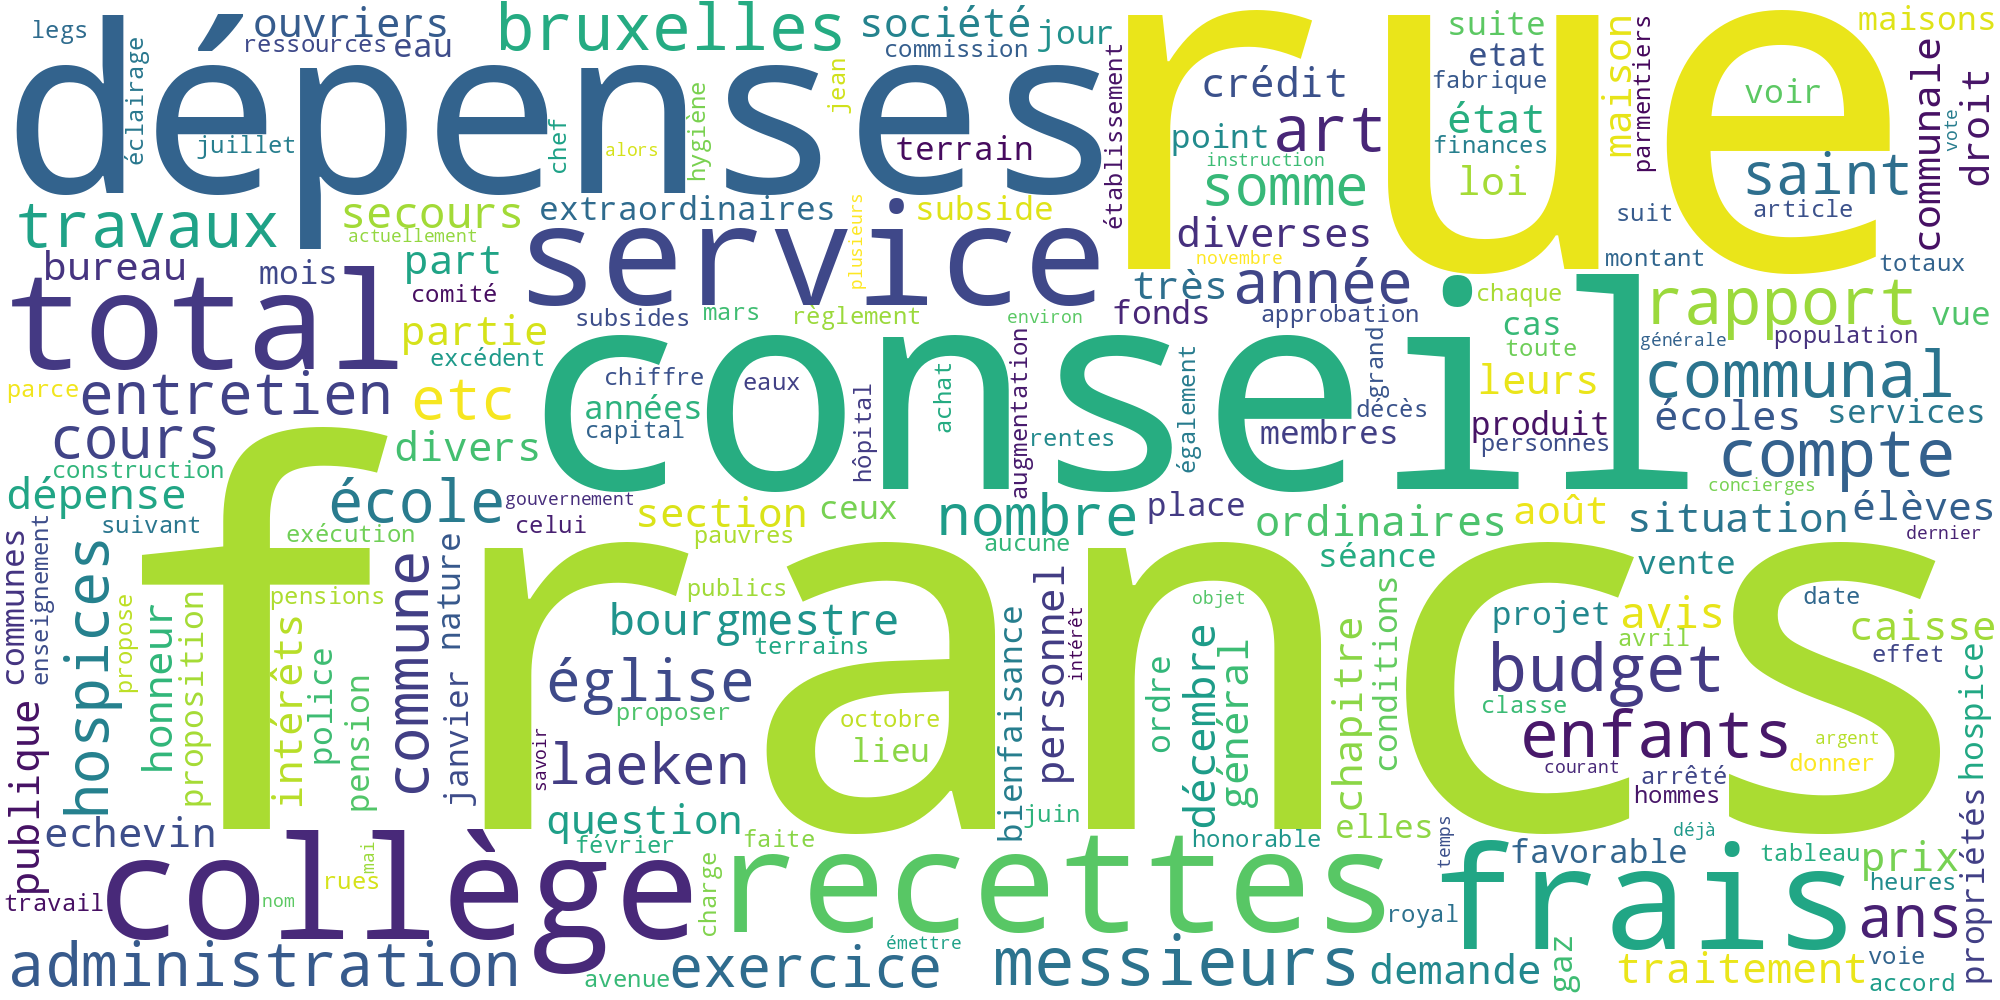

In [47]:
cloud = WordCloud(width=2000, height=1000, background_color='white').generate_from_frequencies(frequencies)
cloud.to_file(os.path.join(temp_path, f"{year}.png"))
Image(filename=os.path.join(temp_path, f"{year}.png"))